# ~~~~~ Day 12 ~~~~~ 
## Part 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import networkx as nx

with open('d12.txt', 'r') as f:
    content = f.readlines()

data = [c.split('-') for c in [d.strip('\n') for d in content]]
data = [{c[0]: c[1]} for c in data] + [{c[1]: c[0]} for c in data]
data

[{'lg': 'GW'},
 {'pt': 'start'},
 {'pt': 'uq'},
 {'nx': 'lg'},
 {'ve': 'GW'},
 {'start': 'nx'},
 {'GW': 'start'},
 {'GW': 'nx'},
 {'pt': 'SM'},
 {'sx': 'GW'},
 {'lg': 'end'},
 {'nx': 'SM'},
 {'lg': 'SM'},
 {'pt': 'nx'},
 {'end': 've'},
 {'ve': 'SM'},
 {'TG': 'uq'},
 {'end': 'SM'},
 {'SM': 'uq'},
 {'GW': 'lg'},
 {'start': 'pt'},
 {'uq': 'pt'},
 {'lg': 'nx'},
 {'GW': 've'},
 {'nx': 'start'},
 {'start': 'GW'},
 {'nx': 'GW'},
 {'SM': 'pt'},
 {'GW': 'sx'},
 {'end': 'lg'},
 {'SM': 'nx'},
 {'SM': 'lg'},
 {'nx': 'pt'},
 {'ve': 'end'},
 {'SM': 've'},
 {'uq': 'TG'},
 {'SM': 'end'},
 {'uq': 'SM'}]

In [2]:
nodes = set(sorted([e for p in data for e in p]))
nodes

{'GW', 'SM', 'TG', 'end', 'lg', 'nx', 'pt', 'start', 'sx', 'uq', 've'}

In [3]:
def recurse_path(current_node, visited_nodes, available_connections, level=0):
    vn = visited_nodes + [current_node]
    if current_node == 'end':
        return [vn]
    possibilities = list(filter(lambda a: current_node in a and (a[current_node].isupper() or a[current_node] not in vn), available_connections))
    if len(possibilities) == 0:
        return None
    sub_paths = []
    for p in possibilities:
        sub_path = recurse_path(p[current_node], vn, list(filter(lambda a: p != a, available_connections)), level=level+1)
        if sub_path:
            sub_paths += sub_path
    return sub_paths

paths = recurse_path('start', [], data)
len(paths)

3708

## Part 2

In [4]:
list(filter(lambda a: a[list(a)[0]].isupper(), data))

[{'lg': 'GW'},
 {'ve': 'GW'},
 {'pt': 'SM'},
 {'sx': 'GW'},
 {'nx': 'SM'},
 {'lg': 'SM'},
 {'ve': 'SM'},
 {'end': 'SM'},
 {'start': 'GW'},
 {'nx': 'GW'},
 {'uq': 'TG'},
 {'uq': 'SM'}]

In [5]:
def recurse_path_2(current_node, visited_nodes, available_connections, small_cave_visited=False, level=0):
    vn = visited_nodes + [current_node]
    scv = small_cave_visited
    if current_node == 'end':
        return [vn]
    possibilities = list(filter(lambda a: current_node in a and (a[current_node] not in vn or a[current_node].isupper() or not scv), available_connections))
    if len(possibilities) == 0:
        return None
    sub_paths = []
    for p in possibilities:
        sub_path = None
        av = list(filter(lambda a: a[list(a)[0]].isupper() or p != a or (p == a and not scv), available_connections))
        if p[current_node].isupper():
            sub_path = recurse_path_2(p[current_node], vn, av, level=level+1, small_cave_visited=scv)
        elif p[current_node] not in vn:
            sub_path = recurse_path_2(p[current_node], vn, av, level=level+1, small_cave_visited=scv) 
        elif p[current_node] != 'start' and p[current_node] in vn and not scv:
            sub_path = recurse_path_2(p[current_node], vn, av, level=level+1, small_cave_visited=True)
        if sub_path:
            sub_paths += sub_path
    return sub_paths

paths = recurse_path_2('start', [], data)
print(len(paths))

93858


In [6]:
plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from([edge for p in [[(p[0], p[1]) for p in zip(path, path[1:])] for path in paths] for edge in p])

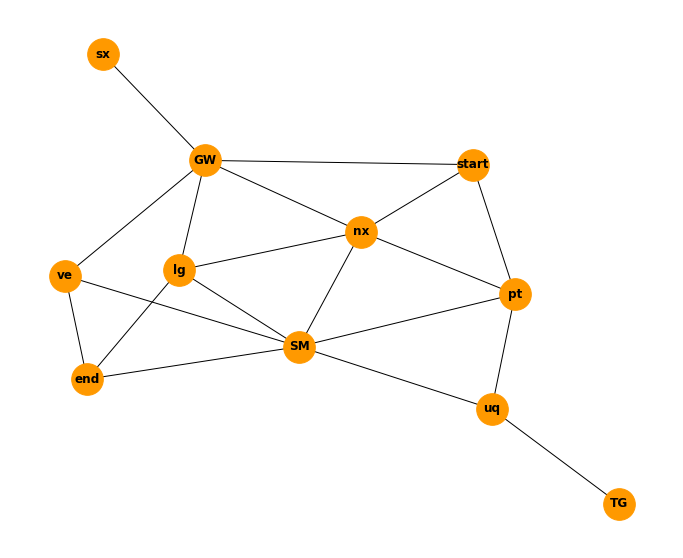

In [7]:
pos = nx.kamada_kawai_layout(G)
subax1 = plt.subplots(1, figsize=(12,10))
nx.draw(G, pos=pos, with_labels=True, font_weight='bold', node_size=1000, node_color='#ff9900', connectionstyle="arc3,rad=0.1")